In [1]:
#Import the libraries
from imblearn.under_sampling import NearMiss            #under-sampling technique used for addressing class imbalance
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model, preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
np.random.seed(42)
warnings.filterwarnings("ignore")

In [2]:
#Read the pre-processed dataset
diabetes_df = pd.read_csv('./Preprocessed_diabetes_data.csv')
diabetes_df.head()

,Unnamed: 0,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,0,1,1,1,40,1,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,1,0,0,0,0,25,1,0,0,1,...,0,1,3,0,0,0,0,7,6,1
2,2,0,1,1,1,28,0,0,0,0,...,1,1,5,30,30,1,0,9,4,8
3,3,0,1,0,1,27,0,0,0,1,...,1,0,2,0,0,0,0,11,3,6
4,4,0,1,1,1,24,0,0,0,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
#Obtain the dimensions (the number of rows and columns) of the DataFrame
diabetes_df.shape

(253680, 23)

In [4]:
#Perform the value counts for the target variable to get the idea of the dataset
diabetes_df['diabetes_012'].value_counts()

0    213703
1     39977
Name: diabetes_012, dtype: int64

In [5]:
#Remove the 'Unnamed: 0' column from the DataFrame.
#This column is added when reading a CSV file that contains an index column, and it's not needed in the analysis.
diabetes_df = diabetes_df.drop(columns=['Unnamed: 0'])

In [6]:
#Print first 10 rows of dataset
diabetes_df.head(10)

,diabetes_012,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [7]:
# Divide Given Columns into Features variables and target
features=diabetes_df.drop(columns=['diabetes_012'])
target= diabetes_df['diabetes_012']

In [8]:
#Set a random state, initialize NearMiss, and under-sampling the dataset to balance class distribution

random_state = 42
nm = NearMiss()
X_res, Y_res = nm.fit_resample(features,target)

In [9]:
#Obtain the dimensions (the number of rows and columns) of the DataFrame
X_res.shape

(79954, 21)

In [10]:
Y_res

0        0
1        0
2        0
3        0
4        0
        ..
79949    1
79950    1
79951    1
79952    1
79953    1
Name: diabetes_012, Length: 79954, dtype: int64

In [11]:
#Obtain the dimensions (the number of rows and columns) of the DataFrame
Y_res.shape

(79954,)

In [12]:
df = pd.DataFrame(Y_res, columns = ['diabetes_012'])
df

,diabetes_012
0,0
1,0
2,0
3,0
4,0
...,...
79949,1
79950,1
79951,1
79952,1


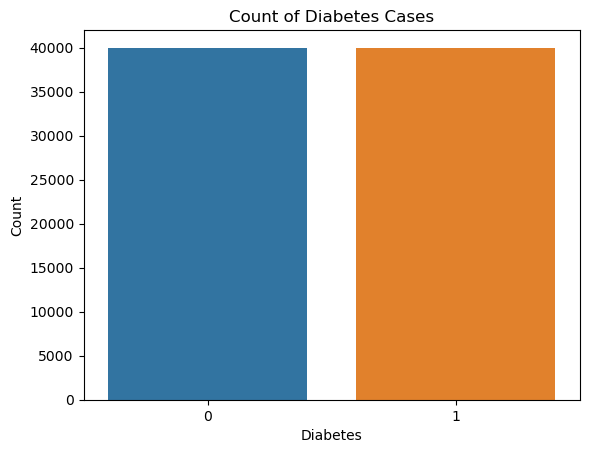

In [88]:
# Create a count plot
sns.countplot(x='diabetes_012', data=df)

# Add labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Diabetes Cases')

# Show the plot
plt.show()

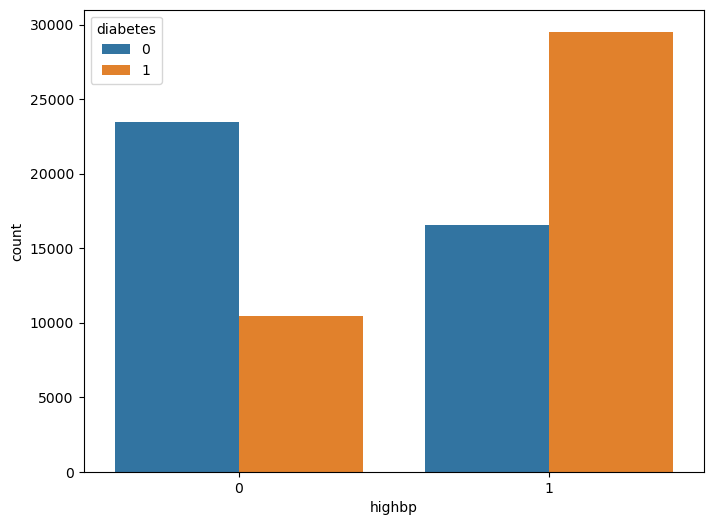

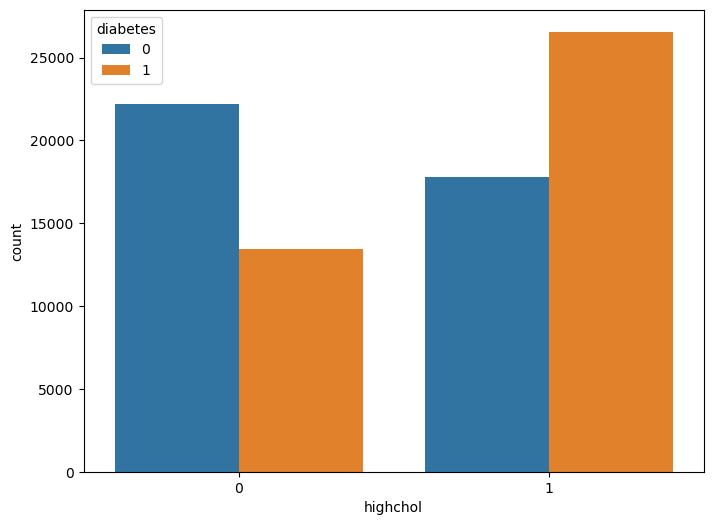

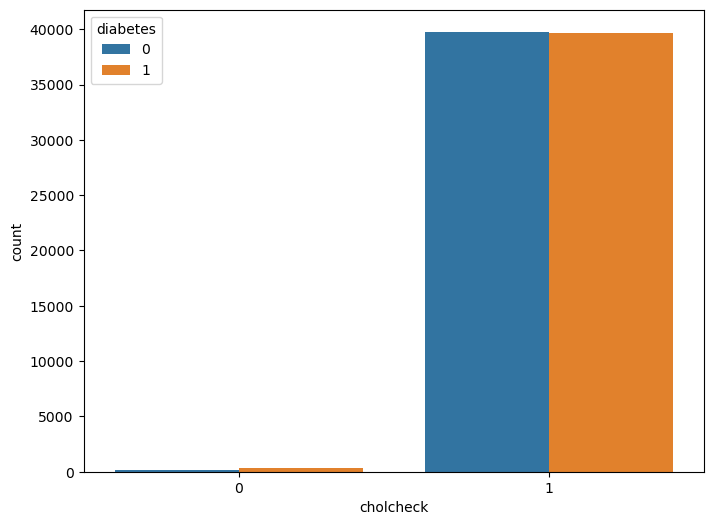

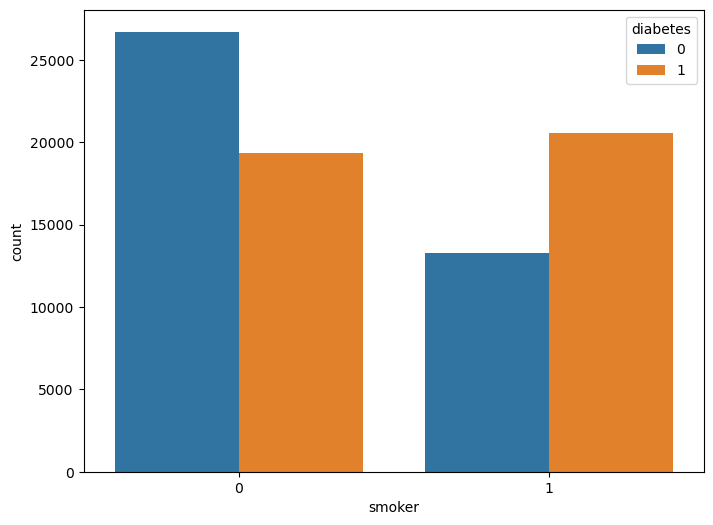

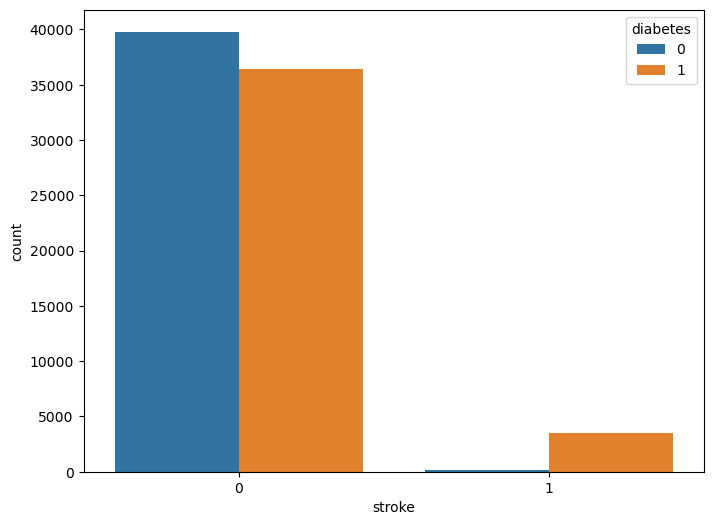

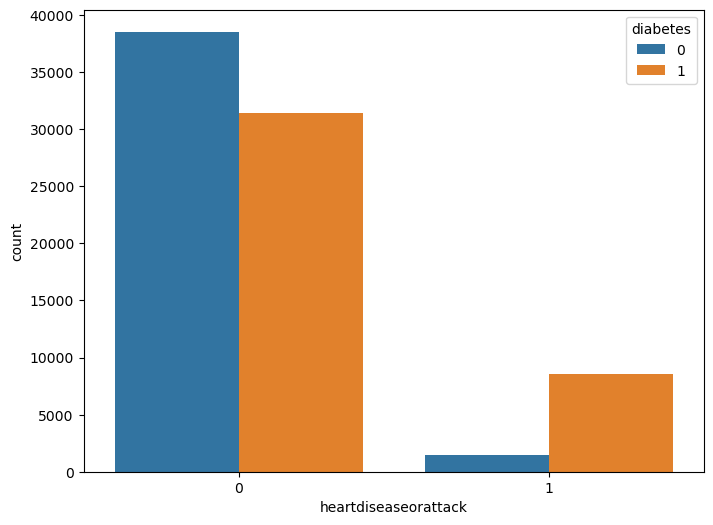

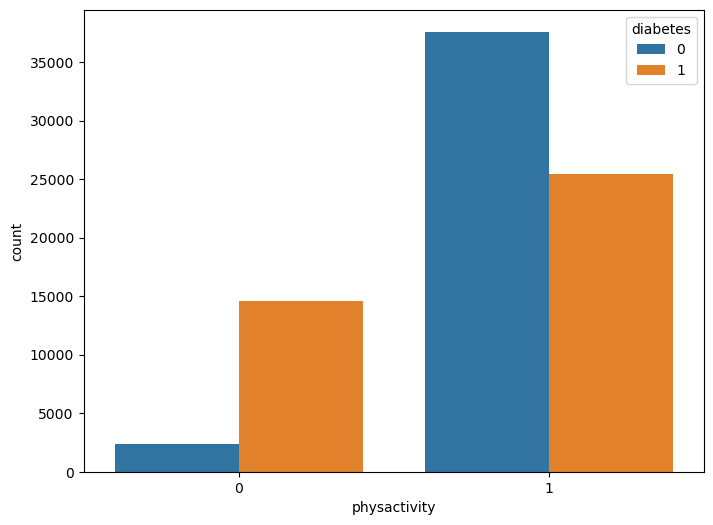

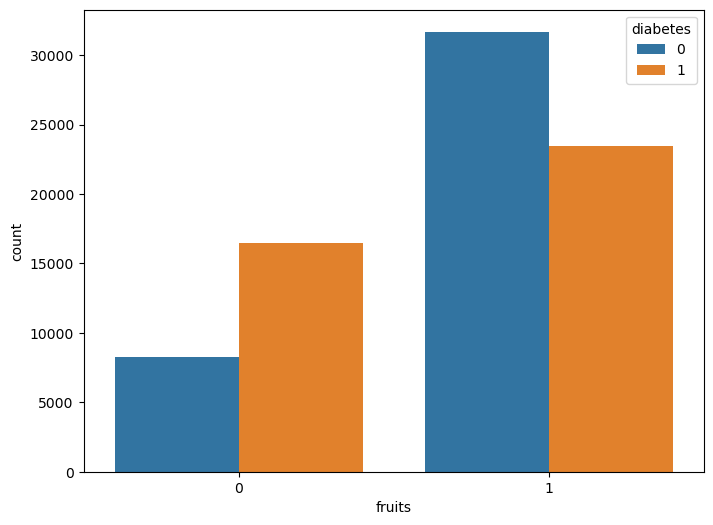

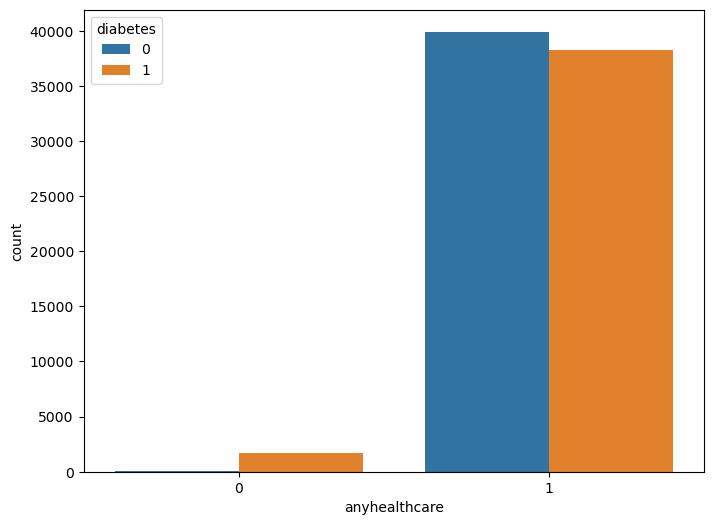

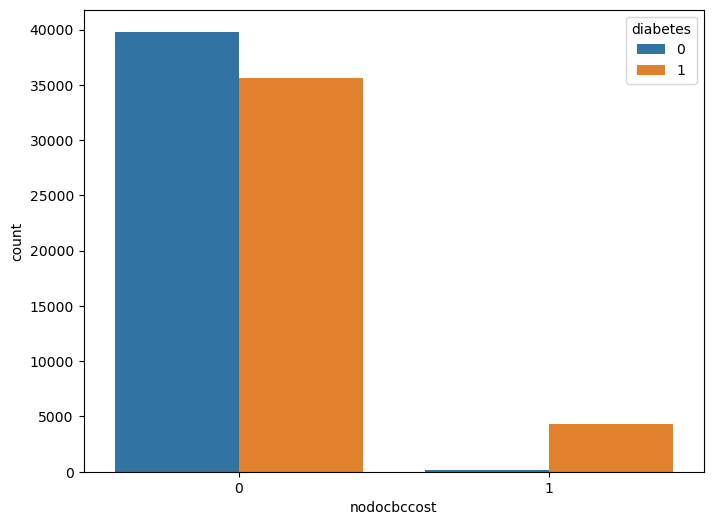

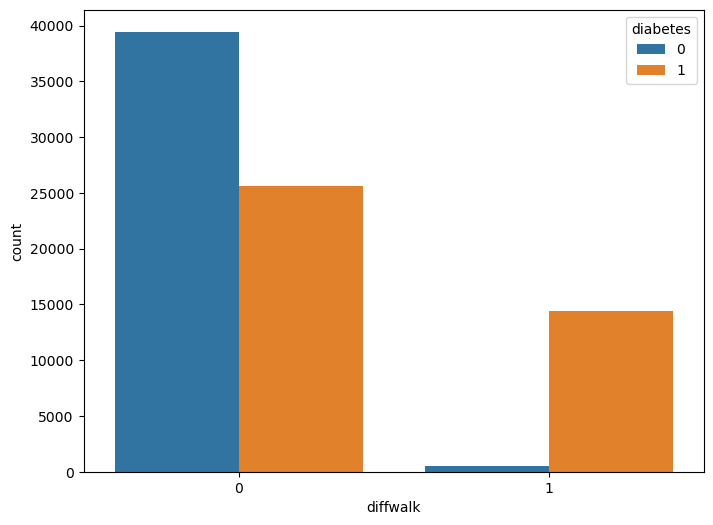

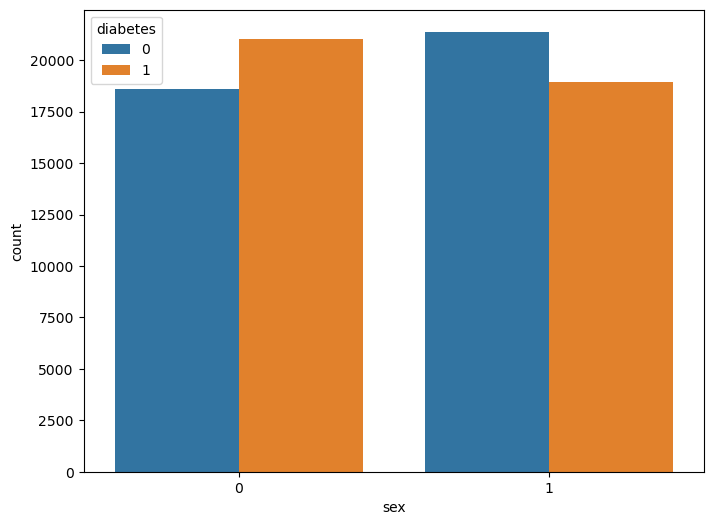

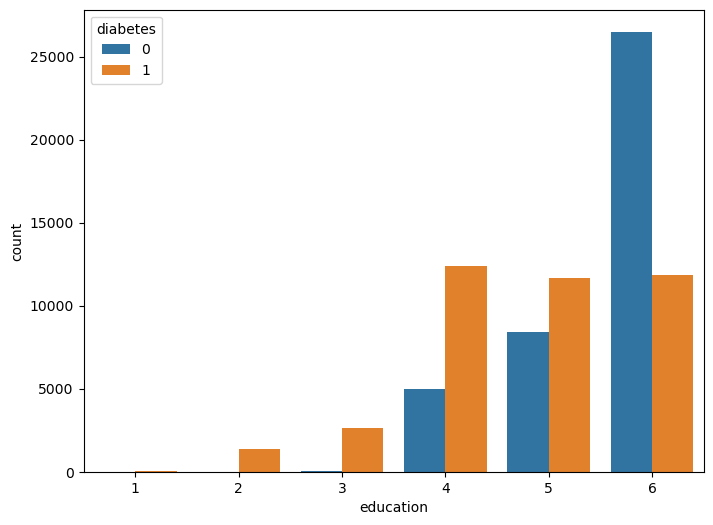

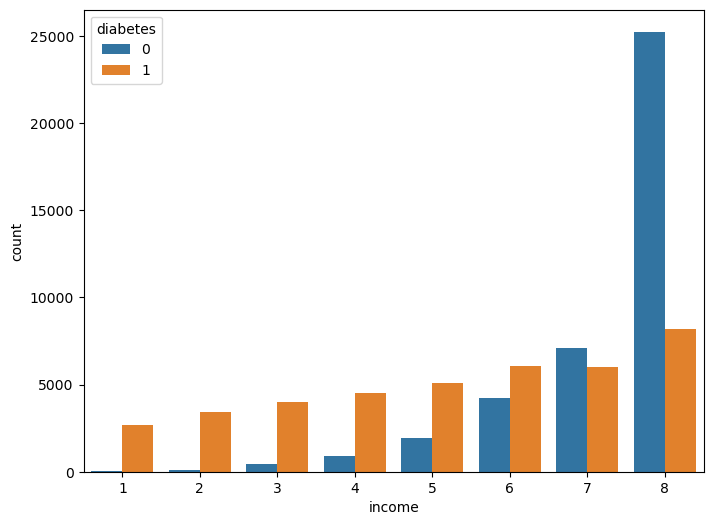

In [81]:
#EDA

cat_features=['highbp','highchol','cholcheck','smoker','stroke','heartdiseaseorattack','physactivity',
              'fruits','anyhealthcare','nodocbccost','diffwalk','sex','education','income']

df_cat = X_res[cat_features]
df_cat['diabetes'] = Y_res

for col in cat_features:
  plt.figure(figsize=(8,6))
  sns.countplot(x = col, hue = 'diabetes', data = df_cat)

In [13]:
#Split the data into 70% train dataset and 30% test dataset
X_train, X_test, y_train, y_test = train_test_split(X_res, Y_res, test_size=0.3, random_state=1)

In [14]:
#Standardizing the training and test sets using StandardScaler for consistent feature scaling.

# Create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()

#fit_transform method fits the scaler to the data and then transforms the data by applying the scaling
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [ ]:
# DECISION TREE CLASSIFIER

In [39]:
db_clf = DecisionTreeClassifier(random_state=123)
#Train decisionTreeClassifier
db_clf.fit(X_train, y_train)
#Predict the response for test data and store it in object names y_pred
y_pred = db_clf.predict(X_test)

In [40]:
#Create a DataFrame to store and check actual and predicted values for model evaluation
results_RS = pd.DataFrame()
results_RS['actual'] = y_test
results_RS['predicted'] = y_pred
results_RS.head(20)

,actual,predicted
55952,1,0
41958,1,1
14551,0,1
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [41]:
# Calculate the Accuracy
print('Accuracy for Decision Tree Classifier: ',accuracy_score(y_test,y_pred))

Accuracy for Decision Tree Classifier:  0.8193187976820778


In [42]:
# Calculate the Precision
print('Precision for Decision Tree Classifier: ',precision_score(y_test,y_pred))

Precision for Decision Tree Classifier:  0.8308345610538175


In [ ]:
# DECISION TREE CLASSIFIER USING RANDOMIZED SEARCH

In [43]:
#Randomized search for tuning the hyperparameters in decision tree classifier.

#find the combination of hyperparameters that yields the best performance
param_grid = {
    'max_depth': [2, 5, 10, 20, 30, 40],                      #The maximum depth of a decision tree
    'min_samples_split': [2, 5, 10, 20, 40, 60, 80, 100],     #The minimum number of samples required to split internal node
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01]  #The minimum impurity decrease required to split internal node
}

In [44]:
#Perform hyperparameter tuning for a decision tree classifier using random search

#Fit the model with above set of parameters
dtree_default = DecisionTreeClassifier(random_state=123)

best_random_search_model = RandomizedSearchCV(
                                                estimator=DecisionTreeClassifier(random_state=1), 
                                                scoring='precision', 
                                                param_distributions=param_grid, 
                                                n_iter = 100, 
                                                cv=10, 
                                                verbose=0, 
                                                n_jobs = -1
                                            )
#This fits the best_random_search_model to the training data (X_train and y_train). 
_ = best_random_search_model.fit(X_train, y_train)


In [45]:
# Best parameters found using randomized search for the decision tree model

random_search_best_params = best_random_search_model.best_params_
print('Best parameters using Ranomized Search for Decision Tree Classifier: ', random_search_best_params)

Best parameters using Ranomized Search for Decision Tree Classifier:  {'min_samples_split': 5, 'min_impurity_decrease': 0.01, 'max_depth': 10}


In [46]:
#Create a DataFrame to store and check actual and predicted values for model evaluation

results_RS = pd.DataFrame()
results_RS['actual'] = y_test
results_RS['predicted'] = best_random_search_model.predict(X_test)
results_RS.head(20)

,actual,predicted
55952,1,0
41958,1,0
14551,0,1
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


Scores for Decision Tree Classifier using randomized Search
Accuracy Score:   0.793263017467795
Precision Score:  0.9405480140774258
Recall Score:     0.6251984292756287
F1 Score:         0.751116687578419
Decision Tree Classifier Confusion Matrix:
[[11545   473]
 [ 4486  7483]]


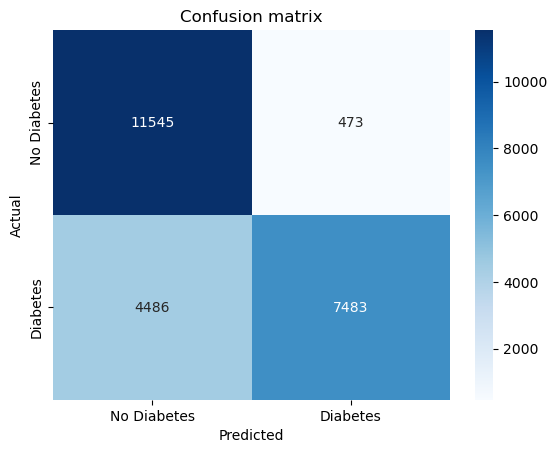

In [76]:
#Check the accuracy, recall, precision and f1 score for the model when used randomized search

y_pred = best_random_search_model.predict(X_test)
print("Scores for Decision Tree Classifier using randomized Search")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred)}")

print('Decision Tree Classifier Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.yticks([0.5, 1.5], ['No Diabetes', 'Diabetes'])
plt.title('Confusion matrix')
plt.show()


In [ ]:
# DECISION TREE CLASSIFIER USING GRID SEARCH

In [57]:
# Grid search keeping the above selected parameters from random search as base parameters and checking the 
#appropriate parameters in its close promixity.


plus_minus = 5  #used for giving the rangeto values.

param_grid_GS = { 
    'max_depth': [x for x in range(random_search_best_params['max_depth']-plus_minus , random_search_best_params['max_depth']+plus_minus,2) if x > 0],
                'min_samples_split': [x for x in range(random_search_best_params['min_samples_split']-plus_minus, random_search_best_params['min_samples_split']+plus_minus,2) if x >= 2],       
                'min_impurity_decrease': [x for x in np.arange(random_search_best_params['min_impurity_decrease']-0.001, random_search_best_params['min_impurity_decrease']+0.001,.0001).round(5) if x >= 0.000]
              }

best_grid_search_model = GridSearchCV(
                                        estimator=DecisionTreeClassifier(random_state=1), 
                                        scoring='precision', 
                                        param_grid=param_grid_GS, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_model.fit(X_train, y_train)



In [204]:
# List of best parameters found with grid search on the base parameters by randomized search
grid_search_best_params = best_grid_search_model.best_params_
print('Best parameters found using Grid Search for Decision Tree Classifier: ', grid_search_best_params)

Best parameters found using Grid Search for Decision Tree Classifier:  {'max_depth': 5, 'min_impurity_decrease': 0.009, 'min_samples_split': 3}


In [205]:
#Check the actual and predicted values side by side to get a better idea.
results_GS = pd.DataFrame()
results_GS['actual'] = y_test
results_GS['predicted'] = best_grid_search_model.predict(X_test)
results_GS.head(20)

,actual,predicted
55952,1,0
41958,1,0
14551,0,1
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [206]:
# Check the accuracy, recall, precision and f1 score for the Decision Tree model after using Grid search.

print("Scores for Decision Tree Classifier using Grid Search")
print(f"{'Accuracy Score: ':18}{accuracy_score(y_test, y_pred_Grid)}")
print(f"{'Precision Score: ':18}{precision_score(y_test, y_pred_Grid)}")
print(f"{'Recall Score:':18}{recall_score(y_test, y_pred_Grid)}")
print(f"{'F1 Score: ':18}{f1_score(y_test, y_pred_Grid)}")

Scores for Decision Tree Classifier using Grid Search
Accuracy Score:   0.8678867720015008
Precision Score:  0.9127579737335835
Recall Score:     0.8129334113125575
F1 Score:         0.8599584603826947


In [ ]:
#LOGISTIC REGRESSION USING RANDOMIZED SEARCH

In [49]:

param_grid_log={'solver':['lbfgs','liblinear','saga'],
                'max_iter':[5000,6000,7000,10000]
                }

In [50]:
#Hyperparameter tuning of a logistic regression model using randomized search

lin_model = linear_model.LogisticRegression(random_state=42)
best_log_Reg= RandomizedSearchCV(
                                    estimator=linear_model.LogisticRegression(random_state=42),
                                    scoring='precision', 
                                    param_distributions=param_grid_log, 
                                    n_iter=10,
                                    cv=10, 
                                    verbose=0, 
                                    n_jobs = -1
                                    )

_=best_log_Reg.fit(X_train, y_train)

In [51]:
#Check the actual and predicted values side by side to get a better idea.

y_pred_log_reg = best_log_Reg.predict(X_test)
results_lr = pd.DataFrame()
results_lr['actual'] = y_test
results_lr['predicted'] = y_pred_log_reg
results_lr.head(20)

,actual,predicted
55952,1,0
41958,1,0
14551,0,0
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [52]:
# List of best parameters found using Randomized Search for Logistic Regression.

random_search_best_params_lr = best_log_Reg.best_params_
print('Best parameters found: ', random_search_best_params_lr)

Best parameters found:  {'solver': 'saga', 'max_iter': 10000}


In [53]:
# Check the accuracy, recall, precision and f1 score for the model after using Random search.

print("Scores for Logistic Regression using randomized Search")
print(f"{'Logistic Regression Accuracy Score: ':18}{accuracy_score(y_test, y_pred_log_reg)}")
print(f"{'Logistic Regression Precision Score: ':18}{precision_score(y_test, y_pred_log_reg)}")
print(f"{'Logistic Regression Recall Score:':18}{recall_score(y_test, y_pred_log_reg)}")
print(f"{'Logistic Regression F1 Score: ':18}{f1_score(y_test, y_pred_log_reg)}")
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_log_reg))

Scores for Logistic Regression using randomized Search
Logistic Regression Accuracy Score: 0.8683870429816151
Logistic Regression Precision Score: 0.908795694934125
Logistic Regression Recall Score:0.8183641072771326
Logistic Regression F1 Score: 0.8612124675781421
Logistic Regression Confusion Matrix:
[[11035   983]
 [ 2174  9795]]


In [ ]:
#LOGISTIC REGRESSION USING GRID SEARCH

In [60]:
param_grid_GS_lr = { 'solver':['lbfgs','liblinear','saga'],
                      'max_iter':[x for x in range(random_search_best_params_lr['max_iter']-100 , random_search_best_params_lr['max_iter']+100,100) if x > 0],
                    }

best_grid_search_lrmodel = GridSearchCV(
                                        estimator=linear_model.LogisticRegression(random_state=42), 
                                        scoring='precision', 
                                        param_grid=param_grid_GS_lr, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_lrmodel.fit(X_train, y_train)


In [61]:
 #Check the actual and predicted values side by side to get a better idea.                          
                           
y_pred_lr_GS = best_grid_search_lrmodel.predict(X_test)
results_CLF_GS = pd.DataFrame()
results_CLF_GS['actual'] = y_test
results_CLF_GS['predicted'] = y_pred_lr_GS
results_CLF_GS.head(20)

,actual,predicted
55952,1,0
41958,1,0
14551,0,0
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [62]:
# List of best parameters found using Grid Search for Logistic Regression.

grid_search_best_params_lr = best_grid_search_lrmodel.best_params_
print('Best parameters found: ', grid_search_best_params_lr)

Best parameters found:  {'max_iter': 9900, 'solver': 'lbfgs'}


In [63]:
# Check the accuracy, recall, precision and f1 score for the model after using Grid search.

print("Scores for Logistic Regression using Grid Search")
print(f"{'Logistic Regression Accuracy Score: ':18}{accuracy_score(y_test, y_pred_lr_GS)}")
print(f"{'Logistic Regression Precision Score: ':18}{precision_score(y_test, y_pred_lr_GS)}")
print(f"{'Logistic Regression Recall Score:':18}{recall_score(y_test, y_pred_lr_GS)}")
print(f"{'Logistic Regression F1 Score: ':18}{f1_score(y_test, y_pred_lr_GS)}")
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr_GS))

Scores for Logistic Regression using Grid Search
Logistic Regression Accuracy Score: 0.8683870429816151
Logistic Regression Precision Score: 0.908795694934125
Logistic Regression Recall Score:0.8183641072771326
Logistic Regression F1 Score: 0.8612124675781421
Logistic Regression Confusion Matrix:
[[11035   983]
 [ 2174  9795]]


In [ ]:
#RANDOM FOREST

In [101]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [ ]:
#RANDOM FOREST WITH RANDOMIZED SEARCH

In [15]:
#Hyperparameter grid for Random Forest classifier

param_grid_RF={'bootstrap': [True, False],
                'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [16]:
#Random Forest hyperparameter tuning using randomized search for the best model

rf=RandomForestClassifier(random_state=42)
best_random_rf= RandomizedSearchCV(
                                    estimator=rf,
                                    scoring='precision', 
                                    param_distributions=param_grid_RF, 
                                    n_iter=10,
                                    cv=10, 
                                    verbose=0, 
                                    n_jobs = -1
                                    )
_ = best_random_rf.fit(X_train, y_train)

In [17]:
#Check the actual and predicted values side by side to get a better idea.   

y_pred_rf_rs = best_random_rf.predict(X_test)
results_rf_rs = pd.DataFrame()
results_rf_rs['actual'] = y_test
results_rf_rs['predicted'] = y_pred_rf_rs
results_rf_rs.head(20)

,actual,predicted
55952,1,0
41958,1,1
14551,0,0
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [18]:
# List of best parameters found using randomized search for Random Forest classifier

random_search_best_params_rf = best_random_rf.best_params_
print('Best parameters found: ', random_search_best_params_rf)

Best parameters found:  {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


In [19]:
# Check the accuracy, recall, precision and f1 score for the model after using Random Search .

print("Scores for Random Forest using Random Search")
print(f"{'Random Forest using Random Search Accuracy Score: ':18}{accuracy_score(y_test, y_pred_rf_rs)}")
print(f"{'Random Forest using Random Search Precision Score: ':18}{precision_score(y_test, y_pred_rf_rs)}")
print(f"{'Random Forest using Random Search Recall Score:':18}{recall_score(y_test, y_pred_rf_rs)}")
print(f"{'Random Forest using Random Search F1 Score: ':18}{f1_score(y_test, y_pred_rf_rs)}")
print('Random Forest using Random Search Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf_rs))

Scores for Random Forest using Random Search
Random Forest using Random Search Accuracy Score: 0.8772668528786426
Random Forest using Random Search Precision Score: 0.9205890576941002
Random Forest using Random Search Recall Score:0.8252151391093658
Random Forest using Random Search F1 Score: 0.8702969424618908
Random Forest using Random Search Confusion Matrix:
[[11166   852]
 [ 2092  9877]]


In [20]:
# RANDOM FOREST CLASSIFIER WITH GRID SEARCH

In [21]:
#Grid search for hyperparameter tuning of a Random Forest classifier using a defined parameter grid.

param_grid_GS_rf = { 'bootstrap': [True, False],
                     'max_depth':[x for x in range(random_search_best_params_rf['max_depth']-5 , random_search_best_params_rf['max_depth']+5,10) if x > 10],
                     'max_features': ['auto', 'sqrt'],
                     'min_samples_leaf':[x for x in range(max(1,random_search_best_params_rf['min_samples_leaf']-2 ), random_search_best_params_rf['min_samples_leaf']+2,2) if x > 1],
                     'min_samples_split':[x for x in range(max(1,random_search_best_params_rf['min_samples_split']-5) , random_search_best_params_rf['min_samples_split']+5,5) if x > 2],
                     'n_estimators':[x for x in range(random_search_best_params_rf['n_estimators']-200 , random_search_best_params_rf['n_estimators']+200,100) if x > 100],
                   }

best_grid_search_rfmodel = GridSearchCV(
                                        estimator=rf, 
                                        scoring='precision', 
                                        param_grid=param_grid_GS_rf, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_rfmodel.fit(X_train, y_train)

In [22]:
#Check the actual and predicted values side by side to get a better idea.         
    
y_pred_rf_GS = best_grid_search_rfmodel.predict(X_test)
results_CLF_GS = pd.DataFrame()
results_CLF_GS['actual'] = y_test
results_CLF_GS['predicted'] = y_pred_rf_GS
results_CLF_GS.head(20)

,actual,predicted
55952,1,0
41958,1,1
14551,0,0
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [23]:
# List of best parameters found using Grid Search for Random Forest classifier

grid_search_best_params_rf = best_grid_search_rfmodel.best_params_
print('Best parameters found: ', grid_search_best_params_rf)

Best parameters found:  {'bootstrap': True, 'max_depth': 95, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 600}


In [24]:
# Check the accuracy, recall, precision and f1 score for the model after using Grid Search .

print("Scores for Random Forest using Grid Search")
print(f"{'Random Forest using Grid Search Accuracy Score: ':18}{accuracy_score(y_test, y_pred_rf_GS)}")
print(f"{'Random Forest using Grid Search Precision Score: ':18}{precision_score(y_test, y_pred_rf_GS)}")
print(f"{'Random Forest using Grid Search Recall Score:':18}{recall_score(y_test, y_pred_rf_GS)}")
print(f"{'Random Forest using Grid Search F1 Score: ':18}{f1_score(y_test, y_pred_rf_GS)}")
print('Random Forest using Grid Search Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf_GS))

Scores for Random Forest using Grid Search
Random Forest using Grid Search Accuracy Score: 0.8771834743819569
Random Forest using Grid Search Precision Score: 0.9201825463351029
Random Forest using Grid Search Recall Score:0.8254657866154231
Random Forest using Grid Search F1 Score: 0.8702545582665375
Random Forest using Grid Search Confusion Matrix:
[[11161   857]
 [ 2089  9880]]


In [25]:
# ADABOOST CLASSIFIER WITH RANDOMIZED SEARCH

In [28]:
#Hyperparameter tuning of AdaBoost classifier using randomized search for the best model

ada_classifier = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid_AC_rs = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [
                        DecisionTreeClassifier(min_samples_split=2, min_impurity_decrease=0.01, max_depth=10)
                      ] 
}

best_random_search_ACmodel = RandomizedSearchCV(
                                        estimator=ada_classifier, 
                                        scoring='precision', 
                                        param_distributions=param_grid_AC_rs, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_random_search_ACmodel.fit(X_train, y_train)
                                              

In [29]:
#Check the actual and predicted values side by side to get a better idea.         

y_pred_ac_rs = best_random_search_ACmodel.predict(X_test)
results_ac_rs = pd.DataFrame()
results_ac_rs['actual'] = y_test
results_ac_rs['predicted'] = y_pred_ac_rs
results_ac_rs.head(20)

,actual,predicted
55952,1,0
41958,1,0
14551,0,0
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [30]:
# List of best parameters found using Randomized Search for AdaBoost classifier

random_search_best_params_ac = best_random_search_ACmodel.best_params_
print('Best parameters found: ', random_search_best_params_ac)

Best parameters found:  {'n_estimators': 100, 'learning_rate': 0.1, 'base_estimator': DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01)}


In [31]:
# Check the accuracy, recall, precision and f1 score for the model after using Randomized Search .

print("Scores for AdaBoost using Random Search")
print(f"{'AdaBoost using Random Search Accuracy Score: ':18}{accuracy_score(y_test, y_pred_ac_rs)}")
print(f"{'AdaBoost using Random Search Precision Score: ':18}{precision_score(y_test, y_pred_ac_rs)}")
print(f"{'AdaBoost using Random Search Recall Score:':18}{recall_score(y_test, y_pred_ac_rs)}")
print(f"{'AdaBoost using Random Search F1 Score: ':18}{f1_score(y_test, y_pred_ac_rs)}")
print('AdaBoost using Random Search Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ac_rs))

Scores for AdaBoost using Random Search
AdaBoost using Random Search Accuracy Score: 0.863884604160587
AdaBoost using Random Search Precision Score: 0.9160611854684513
AdaBoost using Random Search Recall Score:0.8005681343470632
AdaBoost using Random Search F1 Score: 0.8544295331936332
AdaBoost using Random Search Confusion Matrix:
[[11140   878]
 [ 2387  9582]]


In [ ]:
# ADABOOST CLASSIFIER WITH GRID SEARCH

In [32]:
# Grid search for hyperparameter tuning of an AdaBoost classifier using a defined parameter grid

param_grid_GS_rf = { 'n_estimators':[x for x in range(random_search_best_params_ac['n_estimators']-30 , random_search_best_params_ac['n_estimators']+30,50) if x > 10],
                     'learning_rate': [x for x in np.arange(random_search_best_params_ac['learning_rate']-0.001, random_search_best_params_ac['learning_rate']+0.001,.0001).round(5) if x >= 0.000],
                     'base_estimator': [
                                        DecisionTreeClassifier(min_samples_split=2, min_impurity_decrease=0.01, max_depth=10)
                                       ]   }

best_grid_search_acmodel = GridSearchCV(
                                        estimator=ada_classifier, 
                                        scoring='precision', 
                                        param_grid=param_grid_GS_rf, 
                                        cv=10, 
                                        verbose=0,  
                                        n_jobs = -1
                                      )
_ = best_grid_search_acmodel.fit(X_train, y_train)                           

In [33]:
#Check the actual and predicted values side by side to get a better idea.  

y_pred_ac_GS = best_grid_search_acmodel.predict(X_test)
results_ac_GS = pd.DataFrame()
results_ac_GS['actual'] = y_test
results_ac_GS['predicted'] = y_pred_ac_GS
results_ac_GS.head(20)

,actual,predicted
55952,1,0
41958,1,0
14551,0,0
25706,0,0
63488,1,1
53425,1,1
56750,1,1
23849,0,0
18226,0,0
62270,1,1


In [34]:
# List of best parameters found using Grid Search for AdaBoost classifier

grid_search_best_params_ac = best_grid_search_acmodel.best_params_
print('Best parameters found: ', grid_search_best_params_ac)

Best parameters found:  {'base_estimator': DecisionTreeClassifier(max_depth=10, min_impurity_decrease=0.01), 'learning_rate': 0.101, 'n_estimators': 70}


In [90]:
# Check the accuracy, recall, precision and f1 score for the model after using Grid Search .

print("Scores for AdaBoost using Grid Search")
print(f"{'Adaboost using Grid Search Accuracy Score: ':18}{accuracy_score(y_test, y_pred_ac_GS)}")
print(f"{'Adaboost using Grid Search Precision Score: ':18}{precision_score(y_test, y_pred_ac_GS)}")
print(f"{'Adaboost using Grid Search Recall Score:':18}{recall_score(y_test, y_pred_ac_GS)}")
print(f"{'Adaboost using Grid Search F1 Score: ':18}{f1_score(y_test, y_pred_ac_GS)}")
print('Adaboost using Grid Search Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_ac_GS))

Scores for AdaBoost using Grid Search
Adaboost using Grid Search Accuracy Score: 0.8645099428857298
Adaboost using Grid Search Precision Score: 0.9169775227164036
Adaboost using Grid Search Recall Score:0.8009858801904921
Adaboost using Grid Search F1 Score: 0.8550660007135212
Adaboost using Grid Search Confusion Matrix:
[[11150   868]
 [ 2382  9587]]


In [91]:
#PRECISION COMPARISON FOR RANDOM AND GRID SEARCH

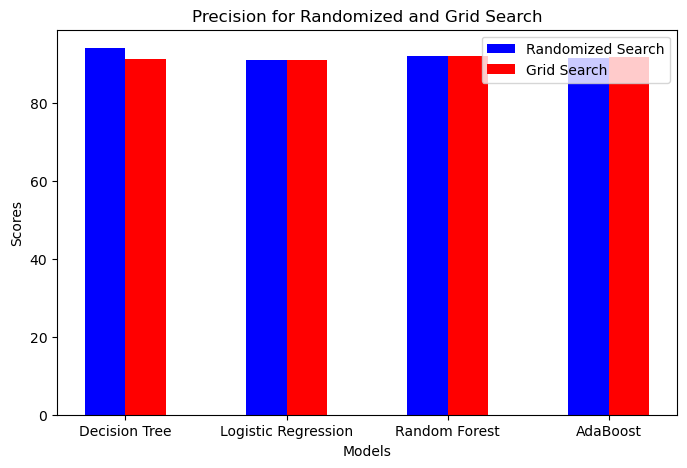

In [92]:
precision_list_R = ['Decision Tree', 'Logistic Regression', 'Random Forest', 'AdaBoost']
precision_list_G = ['DT', 'LR', 'RF', 'AB']
scores_R = [94.05, 90.87, 92.05, 91.60]
scores_G = [91.27, 90.87, 92.01, 91.70]

# Set the width of the bars
bar_width = 0.25

# Create an array to represent the position of each model on the x-axis
x = range(len(precision_list_R))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the precision for Random search
plt.bar(x, scores_R, width=bar_width, label='Randomized Search', color='b', align='center')

# Plot the precision for grid search
plt.bar([i + bar_width for i in x], scores_G, width=bar_width, label='Grid Search', color='r', align='center')

# Set the x-axis labels to be the model names
plt.xticks([i + bar_width / 2 for i in x], precision_list_R)

# Add a legend
plt.legend()

# Set labels and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Precision for Randomized and Grid Search')

# Show the plot
plt.show()

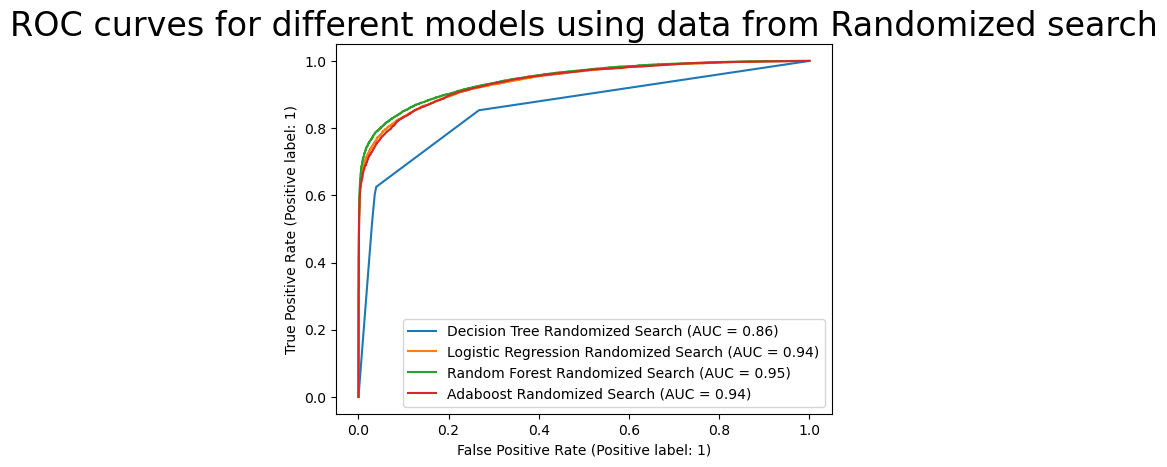

In [97]:
#Plotting ROC curves for different models using data from randomized search.

ROC_RandomizedSearch= RocCurveDisplay.from_estimator(best_random_search_model,X_test,y_test,name='Decision Tree Randomized Search') 
RocCurveDisplay.from_estimator(best_log_Reg,X_test,y_test,ax=ROC_RandomizedSearch.ax_,name='Logistic Regression Randomized Search')
RocCurveDisplay.from_estimator(best_random_rf,X_test,y_test,ax=ROC_RandomizedSearch.ax_,name='Random Forest Randomized Search')
RocCurveDisplay.from_estimator(best_random_search_ACmodel,X_test,y_test,ax=ROC_RandomizedSearch.ax_,name='Adaboost Randomized Search')
plt.title('ROC curves for different models using data from Randomized search', fontsize=24)
plt.show()

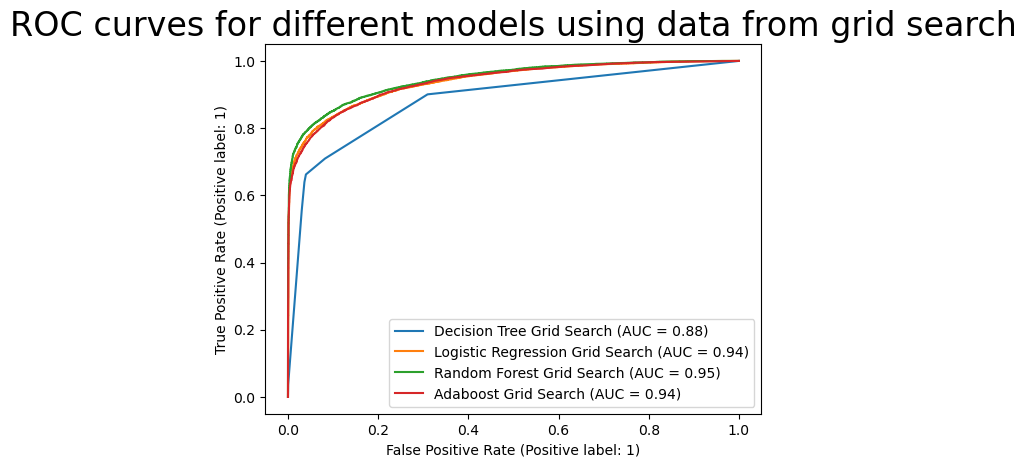

In [96]:
#Plotting ROC curves for different models using data from grid search

ROC_GRIDSearch= RocCurveDisplay.from_estimator(best_grid_search_model,X_test,y_test,name='Decision Tree Grid Search')  
RocCurveDisplay.from_estimator(best_grid_search_lrmodel,X_test,y_test,ax=ROC_GRIDSearch.ax_,name='Logistic Regression Grid Search')
RocCurveDisplay.from_estimator(best_grid_search_rfmodel,X_test,y_test,ax=ROC_GRIDSearch.ax_,name='Random Forest Grid Search')
RocCurveDisplay.from_estimator(best_grid_search_acmodel,X_test,y_test,ax=ROC_GRIDSearch.ax_,name='Adaboost Grid Search')
plt.title('ROC curves for different models using data from grid search', fontsize=24)
plt.show()

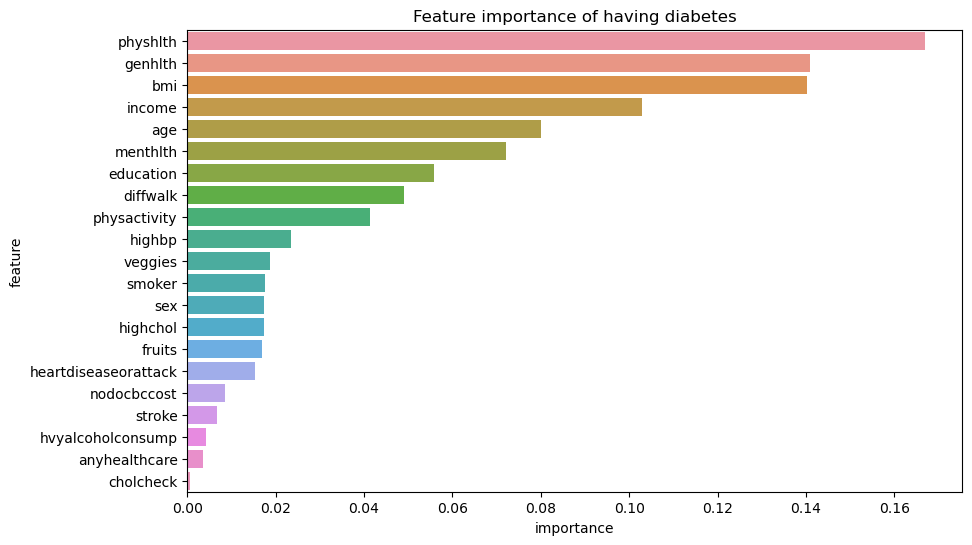

In [102]:
# plot the feature importance
feature_importance = pd.DataFrame({'feature': X_res.columns, 'importance': rf.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having diabetes')
plt.show()